<a href="https://colab.research.google.com/github/jarusgnuj/ioctm358/blob/master/keras_fashion_mnist_feed_forward_Adv_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U tensorflow_datasets

In [1]:
import tensorflow_datasets as input_data
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from IPython.display import IFrame



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [48]:
# Import Fashion MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# # convert class vectors to binary class matrices
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
model.summary()

# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5173 - acc: 0.8145
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3818 - acc: 0.8605
Epoch 3/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3471 - acc: 0.8707
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3280 - acc: 0.8780
Epoch 5/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3110 - acc: 0.8843
Epoch 6/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2955 - acc: 0.8900
Epoch 7/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2892 - acc: 0.8923
Epoch 8/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2753 - acc: 0.8949
Epoch 9/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2695 - acc: 0.8989
Epoch 10/20
60000/60000 [==============================] - 2s 29us/sample - loss: 

In [57]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.896


In [0]:
y_hat = model.predict(x_test)

In [59]:
x_test.shape[0]

10000

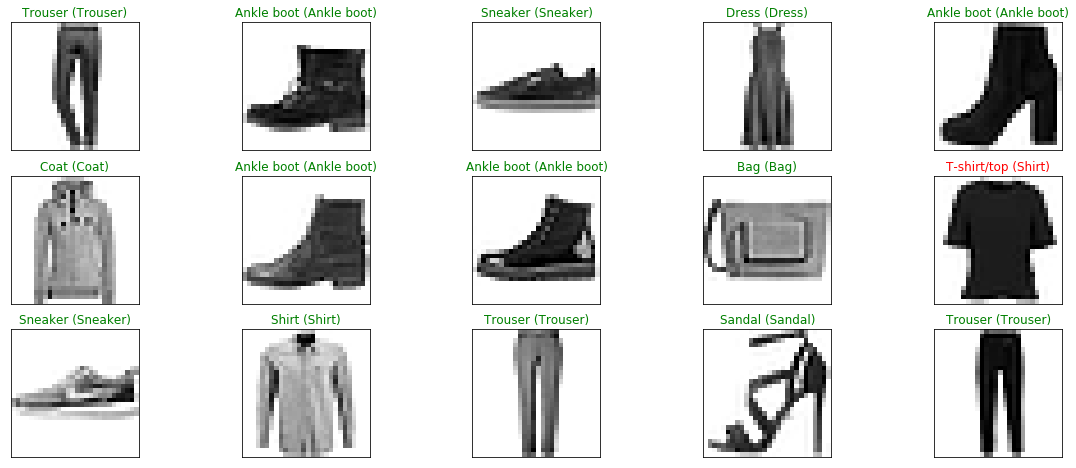

In [60]:


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

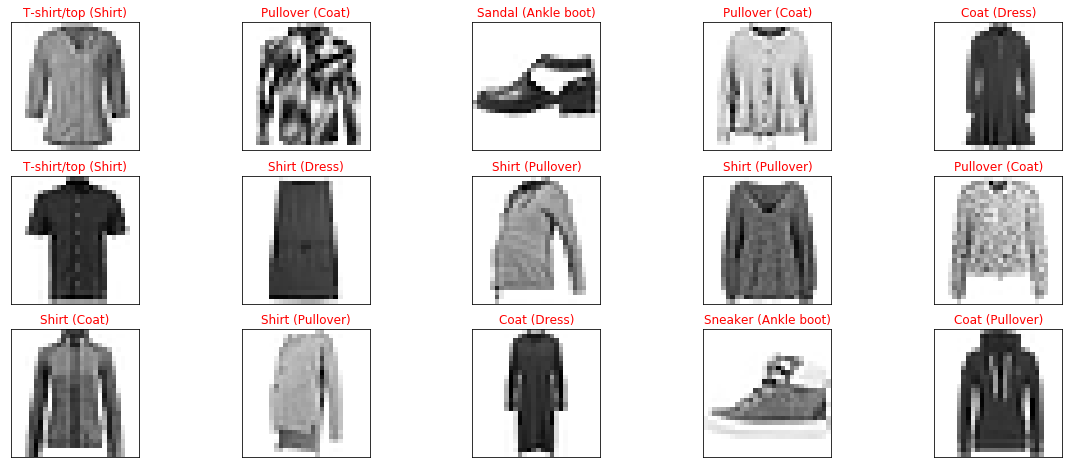

In [61]:
# Plot first 15 incorrect classification test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
incorrect_cnt = 0
for index in range(x_test.shape[0]):
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    if predict_index == true_index:
      continue
    incorrect_cnt += 1
    ax = figure.add_subplot(3, 5, incorrect_cnt, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    if incorrect_cnt== 15:
      break

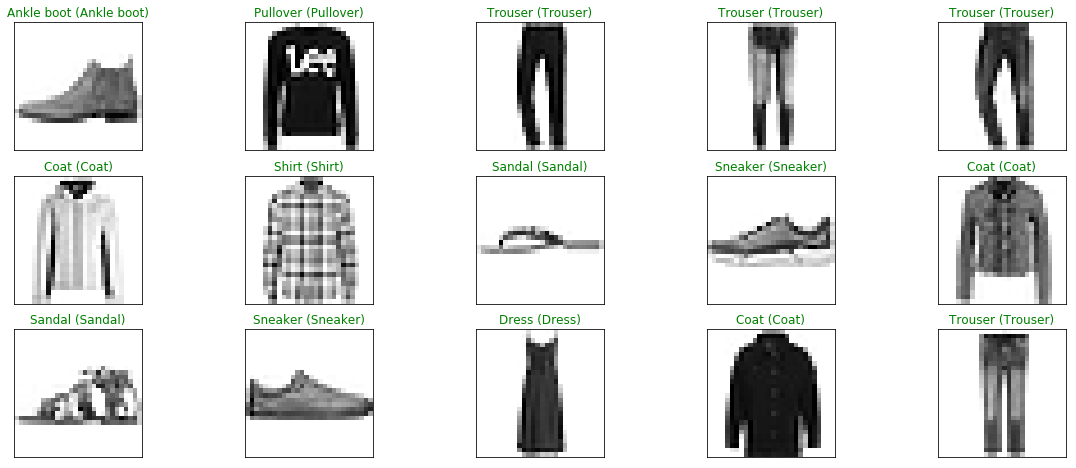

In [62]:
# Plot first 15 correct classification test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
correct_cnt = 0
for index in range(x_test.shape[0]):
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    if predict_index != true_index:
      continue
    correct_cnt += 1
    ax = figure.add_subplot(3, 5, correct_cnt, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    if correct_cnt== 15:
      break